In [2]:
import pandas as pd

In [3]:
df1= pd.read_csv('DP_LIVE_05032023170628727.csv')

In [4]:
df2=pd.read_excel('monthly_average_CNY.xlsx')


In [5]:

# Convert the 'Time' column to datetime format
df1['TIME'] = pd.to_datetime(df1['TIME'])

# Select rows with 'CHN' country code and a timestamp between 2013 and 2022
mask = (df1['LOCATION'] == 'CHN') & (df1['TIME'].dt.year >= 2013) & (df1['TIME'].dt.year <= 2022)
chn_df = df1.loc[mask]

chn_df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
4276,CHN,CPI,TOT,AGRWTH,M,2013-01-01,2.0,NaN
4277,CHN,CPI,TOT,AGRWTH,M,2013-02-01,3.2,NaN
4278,CHN,CPI,TOT,AGRWTH,M,2013-03-01,2.1,NaN
4279,CHN,CPI,TOT,AGRWTH,M,2013-04-01,2.4,NaN
4280,CHN,CPI,TOT,AGRWTH,M,2013-05-01,2.1,NaN
...,...,...,...,...,...,...,...,...
4391,CHN,CPI,TOT,AGRWTH,M,2022-08-01,2.5,NaN
4392,CHN,CPI,TOT,AGRWTH,M,2022-09-01,2.8,NaN
4393,CHN,CPI,TOT,AGRWTH,M,2022-10-01,2.1,NaN
4394,CHN,CPI,TOT,AGRWTH,M,2022-11-01,1.6,NaN


In [6]:
chn_df=chn_df.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1)

In [7]:
chn_df = chn_df.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = pd.concat([chn_df, df2], axis=1)
df3 # China 的dataframe

,LOCATION,TIME,Value,index,CNY/USD
0,CHN,2013-01-01,2.0,2013-01-31,0.160396
1,CHN,2013-02-01,3.2,2013-02-28,0.160114
2,CHN,2013-03-01,2.1,2013-03-31,0.160488
3,CHN,2013-04-01,2.4,2013-04-30,0.161311
4,CHN,2013-05-01,2.1,2013-05-31,0.162514
...,...,...,...,...,...
115,CHN,2022-08-01,2.5,2022-08-31,0.147059
116,CHN,2022-09-01,2.8,2022-09-30,0.142712
117,CHN,2022-10-01,2.1,2022-10-31,0.139092
118,CHN,2022-11-01,1.6,2022-11-30,0.139558


In [8]:
df3 = df3.rename(columns={'CNY/USD': 'USD'})
df3.head()

,LOCATION,TIME,Value,index,USD
0,CHN,2013-01-01,2.0,2013-01-31,0.160396
1,CHN,2013-02-01,3.2,2013-02-28,0.160114
2,CHN,2013-03-01,2.1,2013-03-31,0.160488
3,CHN,2013-04-01,2.4,2013-04-30,0.161311
4,CHN,2013-05-01,2.1,2013-05-31,0.162514


In [9]:
# matplotlib 可行
import matplotlib.pyplot as plt
col1='#4169E1'
col2='#CD5C5C'

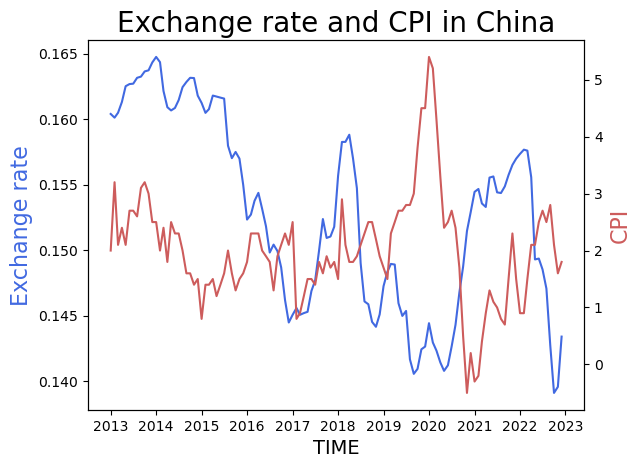

In [10]:


fig,ax=plt.subplots()

ax.plot(df3.TIME, df3.USD, color=col1)

ax.set_xlabel('TIME',fontsize=14)

ax.set_ylabel('Exchange rate', color=col1, fontsize=16)

ax2=ax.twinx()

ax2.plot(df3.TIME, df3.Value, color=col2)

ax2.set_ylabel('CPI', color=col2, fontsize=16)

plt.title('Exchange rate and CPI in China', fontsize=20)

plt.show()


In [11]:
df_CAD=pd.read_excel('monthly_average_CAD.xlsx')

In [12]:
mask2 = (df1['LOCATION'] == 'CAN') & (df1['TIME'].dt.year >= 2013) & (df1['TIME'].dt.year <= 2022)
cad_df = df1.loc[mask2]

In [13]:
cad_df=cad_df.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1)

In [14]:
cad_df = cad_df.reset_index(drop=True)
df_CAD = df_CAD.reset_index(drop=True)
cad_df = pd.concat([cad_df, df_CAD], axis=1)
cad_df # Canada 的dataframe

,LOCATION,TIME,Value,index,CAD/USD
0,CAN,2013-01-01,0.497100,2013-01-31,1.008198
1,CAN,2013-02-01,1.237624,2013-02-28,0.991942
2,CAN,2013-03-01,0.986031,2013-03-31,0.976640
3,CAN,2013-04-01,0.409165,2013-04-30,0.981770
4,CAN,2013-05-01,0.737101,2013-05-31,0.980409
...,...,...,...,...,...
115,CAN,2022-08-01,7.012623,2022-08-31,0.773554
116,CAN,2022-09-01,6.857943,2022-09-30,0.751319
117,CAN,2022-10-01,6.879777,2022-10-31,0.729541
118,CAN,2022-11-01,6.796116,2022-11-30,0.746284


In [15]:
cad_df = cad_df.rename(columns={'CAD/USD': 'USD'})

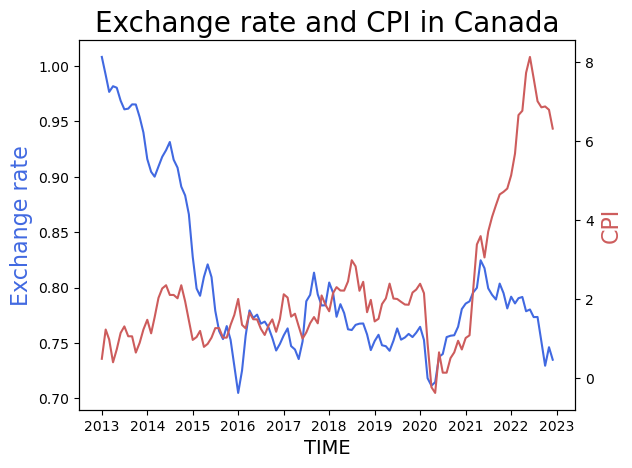

In [16]:

fig,ax=plt.subplots()

ax.plot(cad_df.TIME, cad_df.USD, color=col1)

ax.set_xlabel('TIME',fontsize=14)

ax.set_ylabel('Exchange rate', color=col1, fontsize=16)

ax2=ax.twinx()

ax2.plot(cad_df.TIME, cad_df.Value, color=col2)

ax2.set_ylabel('CPI', color=col2, fontsize=16)

plt.title('Exchange rate and CPI in Canada', fontsize=20)
plt.show()


In [17]:
df_EUR=pd.read_excel('monthly_average_EUR.xlsx')
df_EUR = df_EUR.reset_index(drop=True)

mask3 = (df1['LOCATION'] == 'DEU') & (df1['TIME'].dt.year >= 2013) & (df1['TIME'].dt.year <= 2022)
deu_df = df1.loc[mask3]

deu_df=deu_df.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1)

deu_df = deu_df.reset_index(drop=True)

deu_df = pd.concat([deu_df, df_EUR], axis=1)
deu_df # Germany 的dataframe

deu_df = deu_df.rename(columns={'EUR/USD': 'USD'})
deu_df.head()


,LOCATION,TIME,Value,index,USD
0,DEU,2013-01-01,1.653697,2013-01-31,1.330494
1,DEU,2013-02-01,1.545894,2013-02-28,1.335303
2,DEU,2013-03-01,1.440922,2013-03-31,1.295957
3,DEU,2013-04-01,1.154957,2013-04-30,1.303033
4,DEU,2013-05-01,1.539942,2013-05-31,1.297700


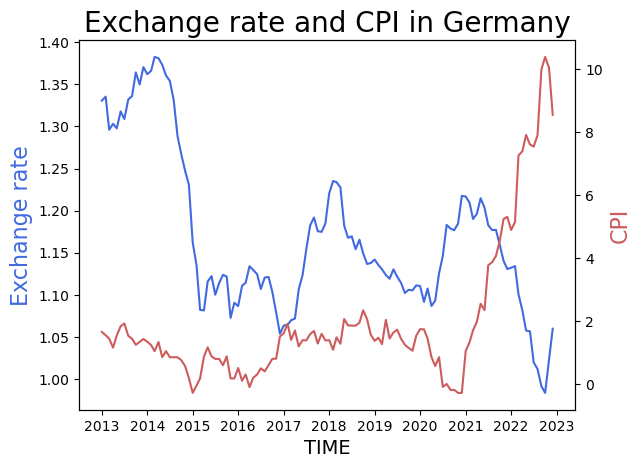

In [18]:
fig,ax=plt.subplots()

ax.plot(deu_df.TIME, deu_df.USD, color=col1)

ax.set_xlabel('TIME',fontsize=14)

ax.set_ylabel('Exchange rate', color=col1, fontsize=16)

ax2=ax.twinx()

ax2.plot(deu_df.TIME, deu_df.Value, color=col2)

ax2.set_ylabel('CPI', color=col2, fontsize=16)

plt.title('Exchange rate and CPI in Germany', fontsize=20)
plt.show()

In [19]:
mask4 = (df1['LOCATION'] == 'FRA') & (df1['TIME'].dt.year >= 2013) & (df1['TIME'].dt.year <= 2022)
fra_df = df1.loc[mask4]

fra_df=fra_df.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1)

fra_df = fra_df.reset_index(drop=True)

fra_df = pd.concat([fra_df, df_EUR], axis=1)
fra_df # Germany 的dataframe

fra_df = fra_df.rename(columns={'EUR/USD': 'USD'})
fra_df.head()

,LOCATION,TIME,Value,index,USD
0,FRA,2013-01-01,1.169711,2013-01-31,1.330494
1,FRA,2013-02-01,1.042305,2013-02-28,1.335303
2,FRA,2013-03-01,0.972940,2013-03-31,1.295957
3,FRA,2013-04-01,0.688259,2013-04-30,1.303033
4,FRA,2013-05-01,0.800000,2013-05-31,1.297700


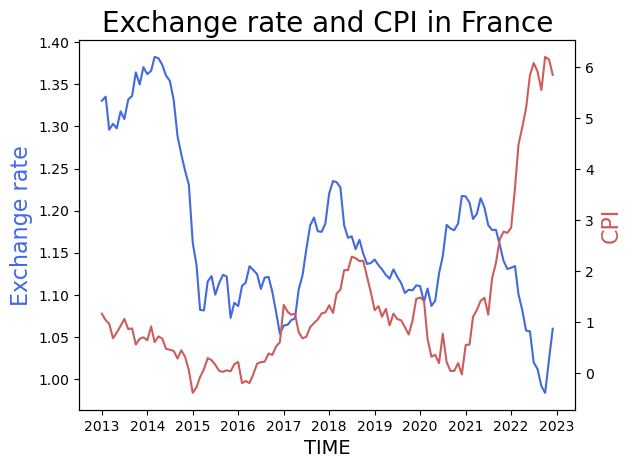

In [20]:
fig,ax=plt.subplots()

ax.plot(fra_df.TIME, fra_df.USD, color=col1)

ax.set_xlabel('TIME',fontsize=14)

ax.set_ylabel('Exchange rate', color=col1, fontsize=16)

ax2=ax.twinx()

ax2.plot(fra_df.TIME, fra_df.Value, color=col2)

ax2.set_ylabel('CPI', color=col2, fontsize=16)

plt.title('Exchange rate and CPI in France', fontsize=20)
plt.show()